# **REDUCCIÓN DE DIMENSIONALIDAD**

Cuantas más dimensiones tengamos más registros necesitaremos para poder representar todas las combinaciones posibles y nuestro modelo se hace más complejo aumentando las posibilidades de overfitting ya que se hace más dependiente de los datos con los que se ha entrenado.


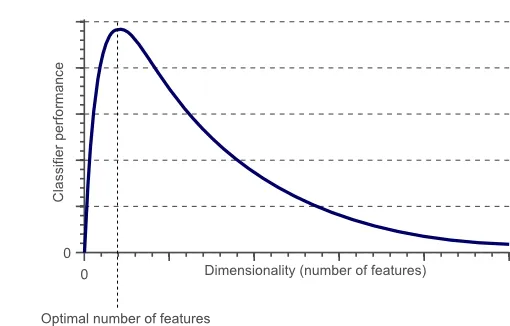


## **Correlación de Pearson (1)**

In [1]:
# Analyse the relationship between 'TV advertising' and 'sales'
#
# https://www.kaggle.com/datasets/ashydv/advertising-dataset/

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("advertising.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [2]:
df.corr(method="pearson")

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Text(0.5, 0, 'TV')

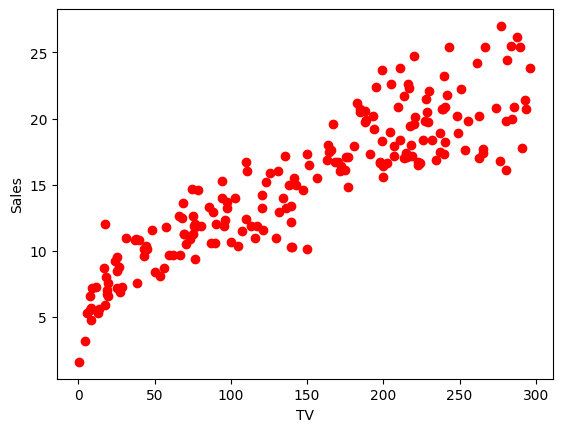

In [3]:
plt.plot(df['TV'], df['Sales'], 'ro')
plt.ylabel("Sales")
plt.xlabel("TV")

Text(0.5, 0, 'Newspaper')

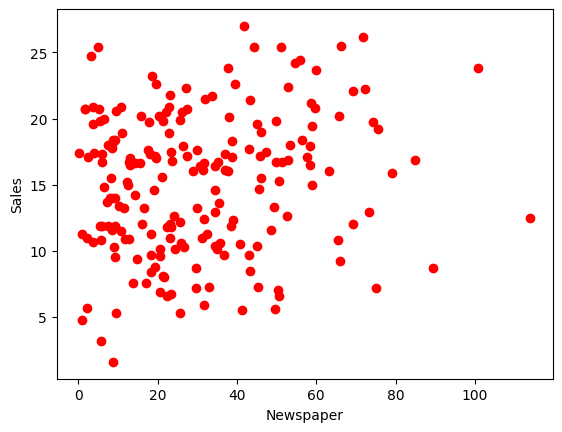

In [4]:
plt.plot(df['Newspaper'], df['Sales'], 'ro')
plt.ylabel("Sales")
plt.xlabel("Newspaper")

## **LDA (Linear Discriminant Analysis)**

LDA es un algoritmo de aprendizaje supervisado que se usa para tareas de clasificación. Como busca la combinación de características que mejor separan las clases en un dataset también se usa en reducción de dimensionalidad.

LDA presupone que todos los datos tienen una distribución gausiana y que las matrices de covarianza de las diferentes clases son iguales.

In [90]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load the iris dataset
iris = load_iris()

# divide the dataset into class and target variable
X = iris.data
y = iris.target

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

Normalizar es escalar los datos para que el rango de valores resultante esté entre 0 y 1, por lo general, y requiere conocer cual es el valor mínimo y máximo del universo para realizar la operación.

Estandarizar se refiere a escalar la distribución de los datos de forma tal que la media de los valores observados sea igual a 0 y su desviación estándar igual a 1.

En general, los algoritmos de machine learning que se basen sobre la hipótesis que los datos poseen una distribución gaussiana requieren que los mismos sean estandarizados. Sin embargo, la selección de la manera de escalar la data no es una tarea de una sola vía, depende mucho de las circunstancias y de los resultados del análisis descriptivo inicial del problema.

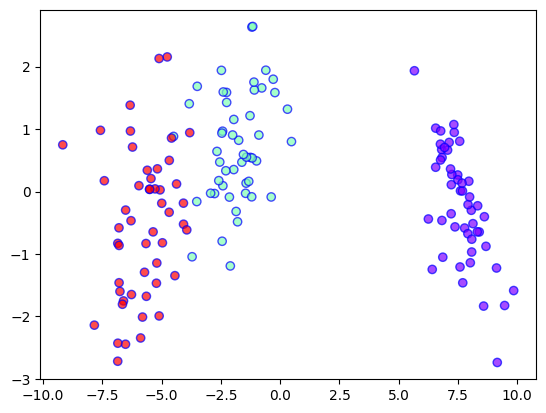

In [91]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X = lda.fit_transform(X, y)

# plot the scatterplot
plt.scatter (X[:,0], X[:,1], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')

## **ANOVA (Analysis of variance)**

El análisis de la varianza (ANOVA) comprueba si existen diferencias estadísticamente significativas entre más de dos muestras. Para ello, se comparan entre sí las medias y las varianzas de los respectivos grupos.

Determina si las medias de dos o más conjuntos de datos provienen de la misma distribución.

El resultado de este text se puede usar para selección de atributos ya que si son independientes del atributo objetivo se pueden eliminar del dataset.

### **Ejemplo 1 (2)**

Una empresa de materiales de construcción quiere estudiar la influencia que tienen el grosor y el tipo de templado sobre la resistencia máxima de unas láminas de acero. Para ello miden el estrés hasta la rotura (variable cuantitativa dependiente) para dos tipos de templado (lento y rápido) y tres grosores de lámina (8mm, 16mm y 24 mm).

In [5]:
!pip install pingouin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=66627a38012b9cfe14568b4d9df055d68febd0d6be38db768e85272cfc47cec3
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
resistencia = [15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85,
               16.35, 17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73,
               13.02, 12.05, 12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82,
               12.49, 13.55, 14.53]

templado = ["rapido"] * 15 + ["lento"] * 15

grosor = ([8] * 5 + [16] * 5 + [24] * 5) * 2

datos = pd.DataFrame({
    'templado': templado,
    'grosor': grosor,
    'resistencia': resistencia
})

datos.head(30)

,templado,grosor,resistencia
0,rapido,8,15.29
1,rapido,8,15.89
2,rapido,8,16.02
3,rapido,8,16.56
4,rapido,8,15.46
5,rapido,16,16.91
6,rapido,16,16.99
7,rapido,16,17.27
8,rapido,16,16.85
9,rapido,16,16.35


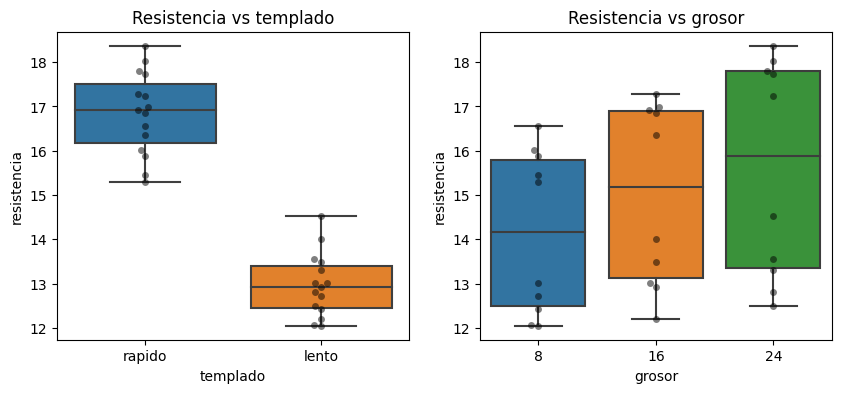

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Resistencia vs templado')
sns.boxplot(x="templado", y="resistencia", data=datos, ax=axs[0])
sns.swarmplot(x="templado", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Resistencia vs grosor')
sns.boxplot(x="grosor", y="resistencia", data=datos, ax=axs[1])
sns.swarmplot(x="grosor", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

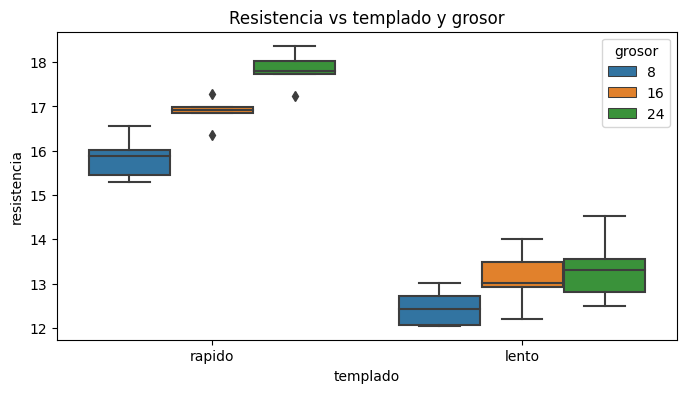

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Resistencia vs templado y grosor')
sns.boxplot(x="templado", y="resistencia", hue='grosor', data=datos, ax=ax);

In [ ]:
print('Resistencia media y desviación típica por templado')
datos.groupby('templado')['resistencia'].agg(['mean', 'std'])


Resistencia media y desviación típica por templado


,mean,std
templado,,
lento,12.974667,0.711345
rapido,16.850667,0.927643


In [ ]:
print('Resistencia media y desviación típica por grosor')
datos.groupby('grosor')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por grosor


,mean,std
grosor,,
8,14.151,1.836993
16,15.001,2.036797
24,15.586,2.442354


In [ ]:
print('Resistencia media y desviación típica por templado y grosor')
datos.groupby(['templado', 'grosor'])['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado y grosor


mean       std
templado grosor                  
lento    8       12.458  0.420797
         16      13.128  0.672473
         24      13.338  0.783371
rapido   8       15.844  0.500030
         16      16.874  0.334186
         24      17.834  0.417169

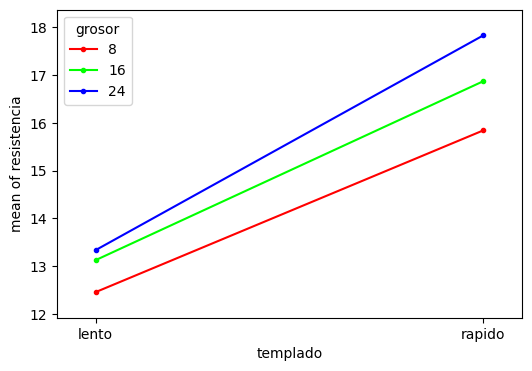

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.templado,
    trace    = datos.grosor,
    response = datos.resistencia,
    ax       = ax,
)

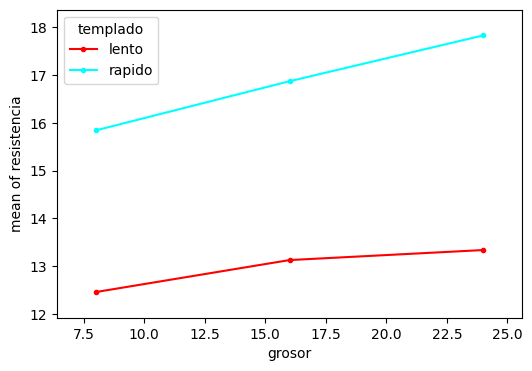

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.grosor,
    trace    = datos.templado,
    response = datos.resistencia,
    ax       = ax,
)

In [ ]:
# Test ANOVA de dos vías (Two-way ANOVA)
# El análisis de varianza de dos factores comprueba si existe una diferencia entre más de dos muestras independientes divididas entre dos variables o factores.
# ==============================================================================

pg.anova(
    data     = datos,
    dv       = 'resistencia',
    between  = ['templado', 'grosor'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,templado,112.6753,1,112.6753,380.0820,0.0000,0.9406
1,grosor,10.4132,2,5.2066,17.5631,0.0000,0.5941
2,templado * grosor,1.6035,2,0.8018,2.7045,0.0873,0.1839
3,Residual,7.1148,24,0.2964,NaN,NaN,NaN


SS es la suma de los cuadrados de cada valor individual menos la media. DF son los grados de libertad.

**INTERPRETACIÓN**

La primera fila comprueba si el templado influye en la resistencia, la segunda comprueba si el grosor influye en la resistencia y la tercera comprueba si templado y grosor tienen efectos el uso sobre el otro.

Cómo p es inferior a 0.05 tanto el templado como el grosor influyen en la resistencia.

El análisis de varianza confirma que existe una influencia significativa sobre la resistencia de las láminas por parte de ambos factores (templado y grosor) con tamaños de efecto  η2 grande y mediano respectivamente. Sin embargo, no se detecta una interacción significativa entre ellos.

### **Ejemplo 2**

In [16]:

import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


In [24]:
names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('pima-indians-diabetes.csv', names = names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
X=df.drop('Outcome', axis = 1)
y=df['Outcome']

In [26]:
bestfeatures = SelectKBest (score_func=f_classif, k = 3)
fit = bestfeatures.fit(X,y)
print(fit.scores_)
print(fit.pvalues_)

[ 39.67022739 213.16175218   3.2569504    4.30438091  13.28110753
  71.7720721   23.8713002   46.14061124]
[5.06512730e-10 8.93543165e-43 7.15139001e-02 3.83477048e-02
 2.86186460e-04 1.22980749e-16 1.25460701e-06 2.20997546e-11]


Feature 0: 39.670227
Feature 1: 213.161752
Feature 2: 3.256950
Feature 3: 4.304381
Feature 4: 13.281108
Feature 5: 71.772072
Feature 6: 23.871300
Feature 7: 46.140611


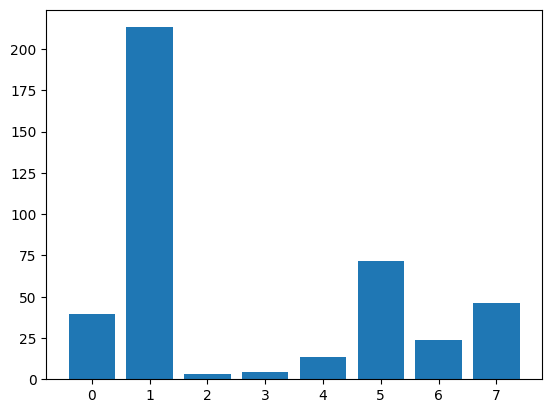

In [27]:
# what are scores for the features
for i in range(len(fit.scores_)):
 print('Feature %d: %f' % (i, fit.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fit.scores_))], fit.scores_)
pyplot.show()

## **chi-square**

### **Ejemplo 1**

In [81]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

# load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# use SelectPercentile to select top 30 percentile of features
selector = SelectPercentile(chi2, percentile=30)
X_selected = selector.fit_transform(X, y)

# get the selected features
selected_features = selector.get_support(indices=True)

# print the selected feature indices
print(selected_features)

[2]


### **Ejemplo 2**

In [88]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale
from matplotlib import pyplot

names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('pima-indians-diabetes.csv', names = names)

X=df.drop('Outcome', axis = 1)
y=df['Outcome']

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=30).fit(X_bin, y)
chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(), chi2_selected_features))
print (bestfeatures)


Chi2 selected 3 features ['Glucose', 'BMI', 'Age'].
[]


# **Column Transformer with Mixed Types (3)**

This example illustrates how to apply different preprocessing and feature extraction pipelines to different subsets of features, using ColumnTransformer. This is particularly handy for the case of datasets that contain heterogeneous data types, since we may want to scale the numeric features and one-hot encode the categorical ones.

In this example, the numeric data is standard-scaled after mean-imputation. The categorical data is one-hot encoded via OneHotEncoder, which creates a new category for missing values. We further reduce the dimensionality by selecting categories using a chi-squared test.

In addition, we show two different ways to dispatch the columns to the particular pre-processor: by column names and by column data types.

Finally, the preprocessing pipeline is integrated in a full prediction pipeline using Pipeline, together with a simple classification model.

In [52]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

np.random.seed(0)

In [53]:
# Load data from https://www.openml.org/d/40945

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True, parser="pandas")

# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

Use ColumnTransformer by selecting column by names

We will train our classifier with the following features:

Numeric Features:

age: float;

fare: float.

Categorical Features:

embarked: categories encoded as strings {'C', 'S', 'Q'};

sex: categories encoded as strings {'female', 'male'};

pclass: ordinal integers {1, 2, 3}.

We create the preprocessing pipelines for both numeric and categorical data. Note that pclass could either be treated as a categorical or numeric feature.

In [54]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [55]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.798


(1) https://medium.com/@hdezfloresmiguelangel/el-coeficiente-de-correlaci%C3%B3n-de-pearson-con-ejemplo-en-python-6e8588f67e35

(2) https://cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python


(3) https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

